In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
# how big the data is
df.shape

(541909, 8)

In [4]:
# how does the data look like
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
114427,546009,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,6,2011-03-08 15:45:00,8.50,16426.0,United Kingdom
410512,572103,23353,6 GIFT TAGS VINTAGE CHRISTMAS,4,2011-10-20 15:57:00,0.83,17571.0,United Kingdom
432812,573892,22698,PINK REGENCY TEACUP AND SAUCER,6,2011-11-01 13:57:00,2.95,14911.0,EIRE
17474,537764,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,2010-12-08 12:06:00,1.95,16893.0,United Kingdom
85737,543518,85017B,ENVELOPE 50 BLOSSOM IMAGES,48,2011-02-09 11:21:00,0.85,12753.0,Japan
177306,552054,22586,FELTCRAFT HAIRBAND PINK AND BLUE,12,2011-05-06 10:19:00,0.85,15062.0,United Kingdom
63695,541590,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-01-19 14:50:00,4.95,13310.0,United Kingdom
60792,541423,21948,SET OF 6 CAKE CHOPSTICKS,2,2011-01-17 17:54:00,1.25,NaN,United Kingdom
407356,571883,23191,BUNDLE OF 3 RETRO NOTE BOOKS,1,2011-10-19 13:58:00,1.65,14704.0,United Kingdom
157840,550213,22501,PICNIC BASKET WICKER LARGE,2,2011-04-15 10:42:00,20.79,NaN,United Kingdom


In [5]:
#what is the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# are there any missing value
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# how does the dat look like matheatically
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
#are there any duplicated value
df.duplicated().sum()

5268

In [9]:
#how is the correaltion between the column
df.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


# Data Cleanning

Here we clean the value on our data to reduce the data error in further execution


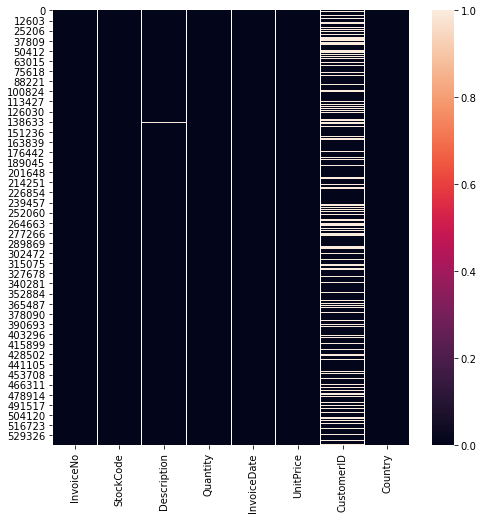

In [10]:
#------------------plotting the heat map for the missing value
missing_values = df.isnull()
plt.figure(figsize = [8,8])
sns.heatmap(missing_values)
plt.show()

In [11]:
df_missing = df[df['CustomerID'].isnull()]
df_missing

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [12]:
sum(pd.isnull(df['CustomerID']))

135080

In [13]:
df.dropna(subset = ['CustomerID'] ,inplace = True)

In [14]:
df.shape

(406829, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


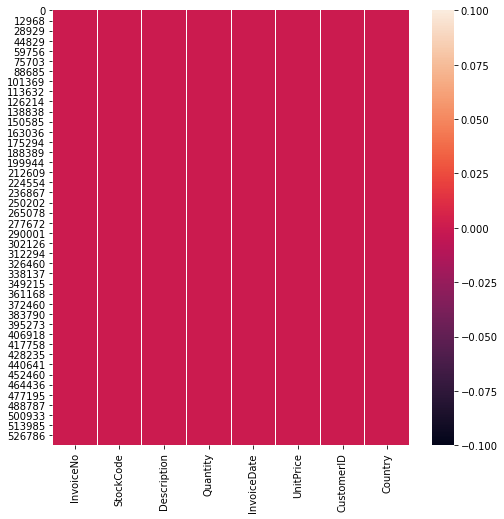

In [16]:
processed_values = df.isnull()
plt.figure(figsize = [8,8])
sns.heatmap(processed_values)
plt.show()

In [17]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [18]:
df = df[df['Quantity']>0 ]
df.shape

(397924, 8)

In [19]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [20]:
#-----------------------Dropping duplicate dvalues
df.duplicated().sum()

5192

In [21]:
df = df.drop_duplicates()

In [22]:
df.shape

(392732, 8)

# Data Visualisation


In [23]:
#-----------------no.of transaction for each country------------------------------
#----------------using group by opreation------------------------

In [24]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [25]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

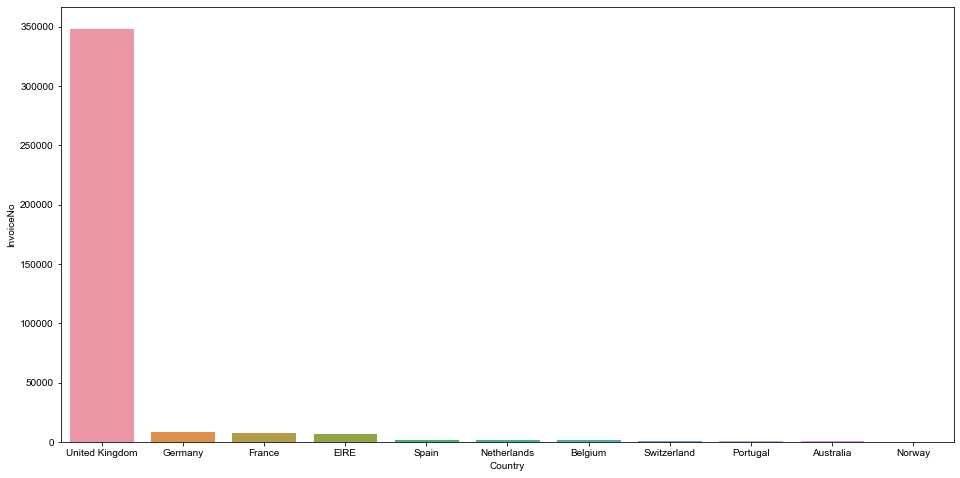

In [26]:
country_data = df.groupby('Country').count().reset_index()
country_data.sort_values('InvoiceNo',ignore_index = True , ascending = False , inplace = True)
fig, axes = plt.subplots(figsize = (16,8))
sns.set_style('darkgrid')
sns.barplot(data = country_data[0:11] , x = 'Country' , y= 'InvoiceNo' , ax = axes , linewidth = 1)
plt.show()


# we have the dat of one year  , we can check total no.of transaction per mouth

In [27]:
df['Month'] = df['InvoiceDate'].apply(lambda x : x.month)
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
31146,538900,22107,PIZZA PLATE IN BOX,4,2010-12-15 09:51:00,3.75,13078.0,United Kingdom,12
446252,574887,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-11-07 14:13:00,4.25,13717.0,United Kingdom,11
334676,566264,22277,COSMETIC BAG VINTAGE ROSE PAISLEY,1,2011-09-11 13:07:00,2.10,14606.0,United Kingdom,9
121063,546731,85131A,BEADED PEARL HEART WHITE ON STICK,12,2011-03-16 11:39:00,1.25,13089.0,United Kingdom,3
116728,546305,22956,36 FOIL HEART CAKE CASES,2,2011-03-10 16:16:00,2.10,14056.0,United Kingdom,3
101899,544935,22717,CARD DOG AND BALL,12,2011-02-25 09:09:00,0.42,13870.0,United Kingdom,2
19212,537844,21034,REX CASH+CARRY JUMBO SHOPPER,3,2010-12-08 15:17:00,0.95,17999.0,United Kingdom,12
482275,577443,22595,GINGHAM HEART DECORATION,24,2011-11-20 11:16:00,0.85,12971.0,United Kingdom,11
246850,558731,22385,JUMBO BAG SPACEBOY DESIGN,10,2011-07-01 14:53:00,2.08,13285.0,United Kingdom,7
308527,564022,82482,WOODEN PICTURE FRAME WHITE FINISH,12,2011-08-22 12:10:00,2.55,13269.0,United Kingdom,8


In [28]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

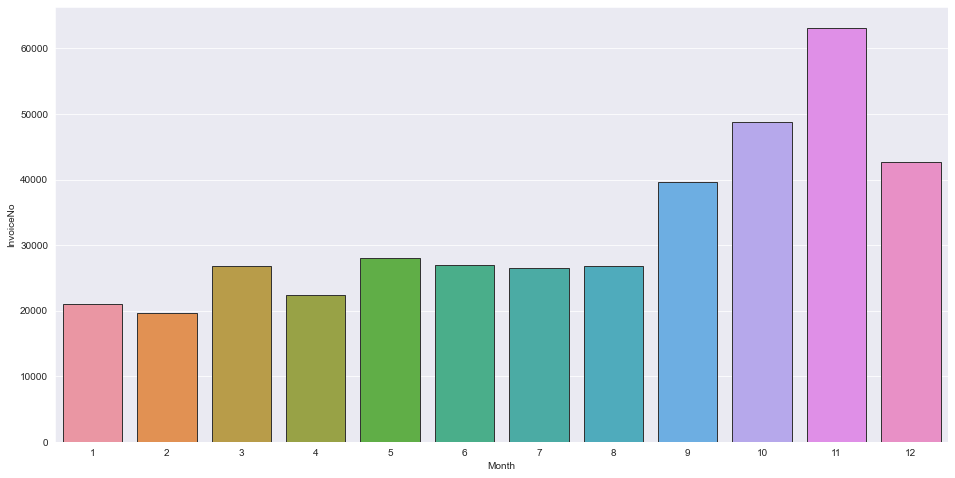

In [29]:
month_data = df.groupby('Month').count().reset_index()
fig, axes = plt.subplots(figsize = (16,8))
sns.set_style('darkgrid')
sns.barplot(data = month_data , x = 'Month' , y= 'InvoiceNo' , ax = axes , linewidth = 1,edgecolor = '0.2')
plt.show()


In [30]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month'],
      dtype='object')

# To Get The Monitry Value for each customer

In [31]:
df['MonetaryValue'] = df.apply(lambda x : x['Quantity']*x['UnitPrice'] , axis =1)
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,MonetaryValue
175030,551869,22328,ROUND SNACK BOXES SET OF 4 FRUITS,5,2011-05-04 16:36:00,2.95,16767.0,United Kingdom,5,14.75
479474,577165,23035,DRAWER KNOB CERAMIC IVORY,6,2011-11-18 10:27:00,1.45,13171.0,United Kingdom,11,8.70
327,536401,22961,JAM MAKING SET PRINTED,4,2010-12-01 11:21:00,1.45,15862.0,United Kingdom,12,5.80
61697,541481,22700,BLACK AND WHITE DOG BOWL,24,2011-01-18 12:09:00,0.85,14696.0,United Kingdom,1,20.40
8891,537154,21787,RAIN PONCHO RETROSPOT,1,2010-12-05 13:05:00,0.85,15808.0,United Kingdom,12,0.85
408541,571944,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",24,2011-10-20 10:15:00,0.39,13755.0,United Kingdom,10,9.36
526885,580678,22964,3 PIECE SPACEBOY COOKIE CUTTER SET,1,2011-12-05 14:49:00,2.10,18015.0,United Kingdom,12,2.10
37748,539477,22489,PACK OF 12 TRADITIONAL CRAYONS,24,2010-12-19 14:58:00,0.42,18245.0,United Kingdom,12,10.08
109871,545661,85049H,URBAN BLACK RIBBONS,12,2011-03-04 14:41:00,1.25,15358.0,United Kingdom,3,15.00
510828,579470,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2011-11-29 15:06:00,4.95,16549.0,United Kingdom,11,4.95


In [32]:
customer_data = df.groupby(df['CustomerID']).sum()
customer_data

,Quantity,UnitPrice,Month,MonetaryValue
CustomerID,,,,
12346.0,74215,1.04,1,77183.60
12347.0,2458,481.21,1383,4310.00
12348.0,2341,178.71,257,1797.24
12349.0,631,605.10,803,1757.55
12350.0,197,65.30,34,334.40
...,...,...,...,...
18280.0,45,47.65,30,180.60
18281.0,54,39.36,42,80.82
18282.0,103,62.39,116,178.05


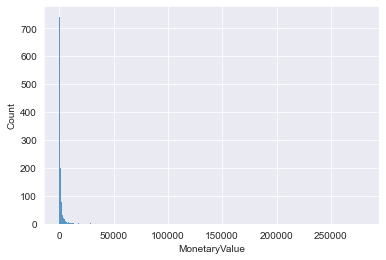

<Figure size 360x360 with 0 Axes>

In [33]:
#plot monetary value
sns.histplot(customer_data["MonetaryValue"])
plt.figure(figsize = (5,5))
plt.show()

In [34]:
customer_data.drop(columns = ["Quantity", "UnitPrice", "Month"], inplace = True)

In [35]:
customer_data["Frequency"] = df.groupby("CustomerID")["MonetaryValue"].count().values
customer_data

,MonetaryValue,Frequency
CustomerID,,
12346.0,77183.60,1
12347.0,4310.00,182
12348.0,1797.24,31
12349.0,1757.55,73
12350.0,334.40,17
...,...,...
18280.0,180.60,10
18281.0,80.82,7
18282.0,178.05,12


<AxesSubplot:xlabel='Frequency', ylabel='Count'>

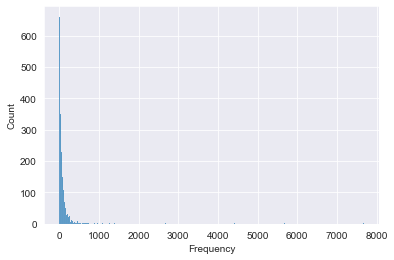

In [36]:
sns.histplot(customer_data["Frequency"])

In [37]:
print(max(df["InvoiceDate"]))
print(min(df["InvoiceDate"]))

2011-12-09 12:50:00
2010-12-01 08:26:00


In [38]:
from datetime import *

In [39]:
last_date = date(2011,12,10)
df["Recency"] = df["InvoiceDate"].apply(lambda x: (last_date - pd.to_datetime(x).date()).days)


In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,MonetaryValue,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,374


In [41]:
customer_data["Recency"] = df.groupby("CustomerID")["Recency"].min().values
customer_data

,MonetaryValue,Frequency,Recency
CustomerID,,,
12346.0,77183.60,1,326
12347.0,4310.00,182,3
12348.0,1797.24,31,76
12349.0,1757.55,73,19
12350.0,334.40,17,311
...,...,...,...
18280.0,180.60,10,278
18281.0,80.82,7,181
18282.0,178.05,12,8


<AxesSubplot:xlabel='Recency', ylabel='Count'>

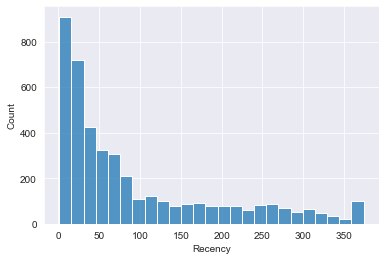

In [42]:
sns.histplot(customer_data["Recency"])

In [43]:
# apply log transformation
customer_data["MonetaryValue"] = customer_data["MonetaryValue"].apply(lambda x :np.log(x+1))
customer_data["Frequency"] = customer_data["Frequency"].apply(lambda x :np.log(x+1))
customer_data["Recency"] = customer_data["Recency"].apply(lambda x :np.log(x+1))

In [44]:
customer_data.head()

,MonetaryValue,Frequency,Recency
CustomerID,,,
12346.0,11.253955,0.693147,5.789960
12347.0,8.368925,5.209486,1.386294
12348.0,7.494564,3.465736,4.343805
12349.0,7.472245,4.304065,2.995732
12350.0,5.815324,2.890372,5.743003


Text(0.5, 0.98, 'Data distribution after log transform')

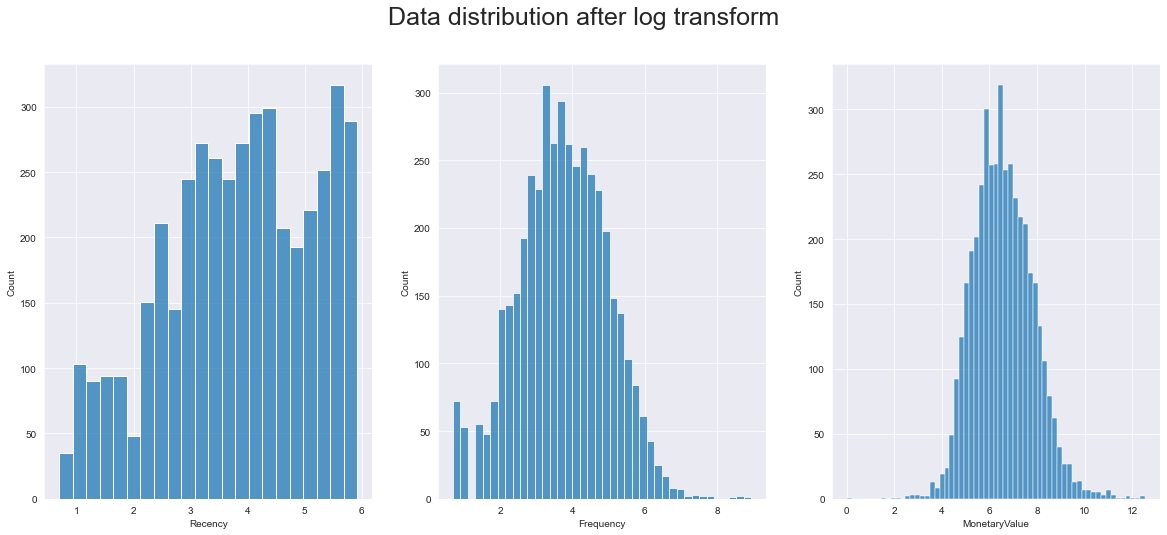

In [45]:
# plot the data distribution after log transform
fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 8))
sns.histplot(customer_data["Recency"], ax = axis[0])
sns.histplot(customer_data["Frequency"], ax = axis[1])
sns.histplot(customer_data["MonetaryValue"], ax = axis[2])

fig.suptitle("Data distribution after log transform", size = 25)

In [46]:
from mpl_toolkits.mplot3d import Axes3D

In [51]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


'C:\Users\Ritesh' is not recognized as an internal or external command,
operable program or batch file.


In [49]:
import plotly.express as px
fig = px.scatter_3d(customer_data, x = "Recency", y = "Frequency", z = "MonetaryValue")
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [52]:
data = pd.DataFrame(customer_data)
data

,MonetaryValue,Frequency,Recency
CustomerID,,,
12346.0,11.253955,0.693147,5.789960
12347.0,8.368925,5.209486,1.386294
12348.0,7.494564,3.465736,4.343805
12349.0,7.472245,4.304065,2.995732
12350.0,5.815324,2.890372,5.743003
...,...,...,...
18280.0,5.201806,2.397895,5.631212
18281.0,4.404522,2.079442,5.204007
18282.0,5.187665,2.564949,2.197225


In [53]:
from sklearn.cluster import KMeans

In [54]:
sse = []
for k in range(1, 21):
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit_predict(data)
  sse.append(kmeans.inertia_)

In [55]:
sse

[21055.57584209235,
 11010.234287232577,
 8539.034587721813,
 6957.131878548093,
 5990.348213417323,
 5267.656724983665,
 4792.182013478947,
 4413.67715689293,
 4108.214763228548,
 3850.8969657036646,
 3604.472753012361,
 3412.900941687815,
 3246.5011331482374,
 3096.3633801938413,
 2963.9305376403663,
 2853.2740428969805,
 2756.381413583105,
 2664.259362836369,
 2590.3899406542646,
 2507.770340475212]

In [56]:
x = np.array(range(1,21))
y = np.array(sse)

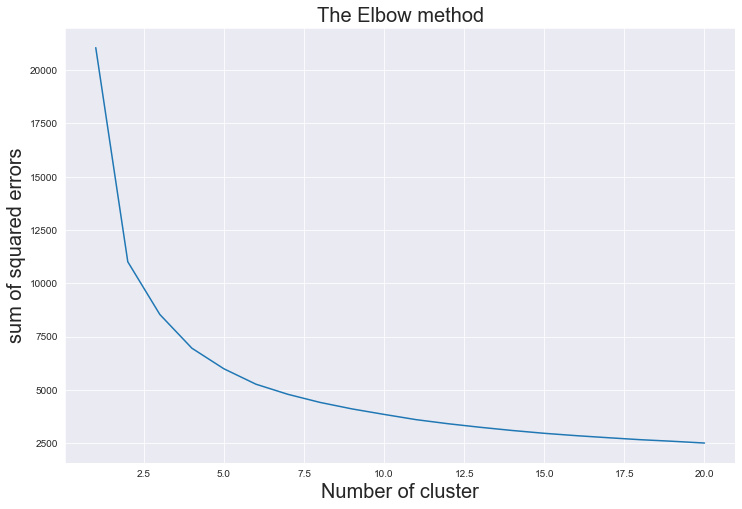

In [57]:
# plot elbow
plt.figure(figsize = (12, 8))
plt.title("The Elbow method", size = 20)
plt.xlabel("Number of cluster", size = 20)
plt.ylabel("sum of squared errors", size = 20)
plt.plot(x, y)

In [58]:
cluster = KMeans(n_clusters = 4, random_state = 42)
cluster_labels = cluster.fit_predict(data)
cluster_labels.shape

(4339,)

In [59]:
customer_data["cluster"] = cluster_labels
customer_data

,MonetaryValue,Frequency,Recency,cluster
CustomerID,,,,
12346.0,11.253955,0.693147,5.789960,1
12347.0,8.368925,5.209486,1.386294,0
12348.0,7.494564,3.465736,4.343805,1
12349.0,7.472245,4.304065,2.995732,0
12350.0,5.815324,2.890372,5.743003,3
...,...,...,...,...
18280.0,5.201806,2.397895,5.631212,3
18281.0,4.404522,2.079442,5.204007,3
18282.0,5.187665,2.564949,2.197225,2


In [60]:
cluster_data = customer_data.groupby("cluster").mean()
cluster_data

,MonetaryValue,Frequency,Recency
cluster,,,
0,8.196879,5.274159,2.363516
1,7.023443,4.181097,4.399415
2,6.177323,3.454965,2.865899
3,5.432315,2.508832,5.048010


In [61]:
cluster_data = cluster_data.applymap(np.exp)
cluster_data = cluster_data.applymap(int)
cluster_data

,MonetaryValue,Frequency,Recency
cluster,,,
0,3629,195,10
1,1122,65,81
2,481,31,17
3,228,12,155


In [ ]:
#cluster 0 == target customer

In [62]:
import pickle
pickle_out = open("cluster.pkl","wb")
pickle.dump(cluster, pickle_out)
pickle_out.close()